## NXPol data and plotting

### Part 1: Opening data and its strcuture

Most data and plotting examples for NXPol make use of the The Python ARM Radar Toolkit (Py-ART) which is a very useful open source radar framework.
https://arm-doe.github.io/pyart/#

Other open source packages are available for radar analysis too. These include wradlib and the Nasa DualPol and PyBlock packages.

Note it's also possible to open the NXPol files using normal netcdf libraries etc, but I'd encourage getting used to the Pyart data framwork as it's quite useful once you are used to it.

In [1]:
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# Other useful modules are:
import numpy as np # For working with the data arrays
import matplotlib.pyplot as plt # For changing/improving plots
import cartopy # For spatial map plots
import glob # For accessing multiple files using wild cards (useful to loop processing / plotting)

Pyart is cabaple of opening multiple different formats used for radar data storage including the CF-radial format used for NXPol data.

In [3]:
# Here is a sample NXPol file
radar_file = '/gws/nopw/j04/ncas_radar_vol1/dufton/MRes_tutorial/ncas-mobile-x-band-radar-1_sandwith_20190814-040009_SUR_QCR_v1.nc'

In [4]:
# Pyart can autodetect the file type, so we can use the read command.
radar = pyart.io.read(radar_file)

# To be explicit we could instead use the full command
# radar = pyart.io.read_cfradial(radar_file)

# It is often better to use the delay field loading flag to avoid the whole file being put into memory in one go, which can be slow.
radar = pyart.io.read(radar_file, delay_field_loading=True)

The Pyart "radar" object acts like a dictionary in many respects (or a set of nested dictionaries) with some extra metadata objects too. All the useful information from the NXPol file can be accessed using the object.

To start we can look at the simple structure of the object. The info method gives a very complete picture of the structure and what is in each file. This example file contains lots of additional fields as it has been processed to contain precipitation estimates.

In [5]:
radar.info(level='compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: <ndarray of type: float64 and shape: (1,)>
antenna_transition: <ndarray of type: int8 and shape: (3600,)>
azimuth: <ndarray of type: float32 and shape: (3600,)>
elevation: <ndarray of type: float32 and shape: (3600,)>
fields:
	CCOR: <ndarray of type: float32 and shape: (3600, 1000)>
	CCORv: <ndarray of type: float32 and shape: (3600, 1000)>
	DOP: <ndarray of type: float32 and shape: (3600, 1000)>
	DOPu: <ndarray of type: float32 and shape: (3600, 1000)>
	KDP: <ndarray of type: float32 and shape: (3600, 1000)>
	PhiDP: <ndarray of type: float32 and shape: (3600, 1000)>
	RhoHV: <ndarray of type: float32 and shape: (3600, 1000)>
	RhoHVu: <ndarray of type: float32 and shape: (3600, 1000)>
	SNR: <ndarray of type: float32 and shape: (3600, 1000)>
	SNRu: <ndarray of type: float32 and shape: (3600, 1000)>
	SNRv: <ndarray of type: float32 and shape: (3600, 1000)>
	SNRvu: <ndarray of type: float32 and shape: (3600, 1000)>
	SQI: <n

In [6]:
# A simple piece of information is the number of radar sweeps contained in the file
radar.nsweeps
# And we can put that into a simple print statement
print('The radar object contains {} sweeps'.format(radar.nsweeps))

The radar object contains 10 sweeps


To obtain "data" we use the fields property of the radar object and treat it like a dictionary. For example to access the unfiltered horizontal reflectivity we use its field name "dBuZ"

In [6]:
print(radar.fields['dBuZ'])

{'long_name': 'unfiltered_reflectivity_from_horizontal_polarization', 'units': 'dBZ', '_FillValue': -9e+33, 'proposed_standard_name': 'radar_equivalent_reflectivity_factor_h', 'sampling_ratio': 1.0, 'grid_mapping': 'grid_mapping', 'coordinates': 'time range', 'data': masked_array(
  data=[[35.380001068115234, 21.8799991607666, 21.8799991607666, ..., --,
         --, --],
        [35.380001068115234, 23.8799991607666, 18.8799991607666, ..., --,
         --, --],
        [35.380001068115234, 24.3799991607666, 20.3799991607666, ..., --,
         --, --],
        ...,
        [35.380001068115234, 23.8799991607666, 19.8799991607666, ..., --,
         --, --],
        [35.380001068115234, 20.8799991607666, 20.3799991607666, ..., --,
         --, --],
        [35.380001068115234, 20.3799991607666, 16.8799991607666, ..., --,
         --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  Tr

The above field object (dictionary) contains more than just the data, it also contains units information and more detailed field names (rather than just "dBUZ"). To obtain the data itself (which is a masked array) we use the data key.

In [7]:
radar.fields['dBuZ']['data']

masked_array(
  data=[[35.380001068115234, 21.8799991607666, 21.8799991607666, ..., --,
         --, --],
        [35.380001068115234, 23.8799991607666, 18.8799991607666, ..., --,
         --, --],
        [35.380001068115234, 24.3799991607666, 20.3799991607666, ..., --,
         --, --],
        ...,
        [35.380001068115234, 23.8799991607666, 19.8799991607666, ..., --,
         --, --],
        [35.380001068115234, 20.8799991607666, 20.3799991607666, ..., --,
         --, --],
        [35.380001068115234, 20.3799991607666, 16.8799991607666, ..., --,
         --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=-9e+33,
  dtype=float32)

We could then access that data as we would any numpy array. For example we might want to know the maximum value of reflectivity in the file.

In [10]:
print(np.max(radar.fields['dBuZ']['data']))

80.38


Once we get used to the radar object strucutre we can then write code and functions that make use of always knowing the data strcuture. These functions can then also run on other radar data (from a different organisation for example) provided Pyart can read that structure into a radar object. We can also use all the inbuilt functions that already exist within Pyart. These include the plotting functions.

### Part 2: Plotting (the interesting bit)

Pyart contains inbuilt plotting functions, including 2D mapping plots and individual ray tracing. These are accessed through a radar display object.

In [7]:
raddisp = pyart.graph.RadarMapDisplay(radar) # Note our radar object is the input to the function

For example a simple plot to create is a trace along a radial of the data. To do this we need to specify the index number of the ray and the field we want to plot. Pyart will then add labels and title information for us (which may not always be what we want on the final plot, but it's a start).

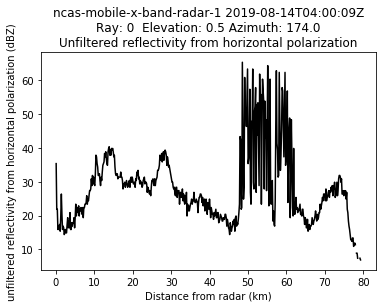

In [8]:
raddisp.plot_ray('dBuZ', 0)

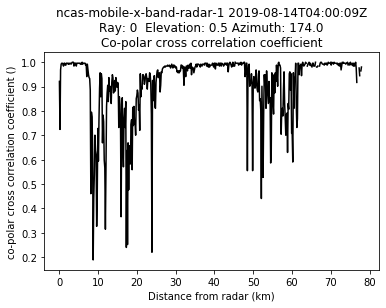

In [9]:
raddisp.plot_ray('RhoHV', 0) # Change the field

More often we want to plot a 2D PPI view of the data. For example here it may help explain why the correlation co-efficent drops significantly in two regions (typically meteorological echoes are above 0.85 to 0.9, so what are we observing?).

For a ppi plot we need to specify the sweep index rather than a ray index.

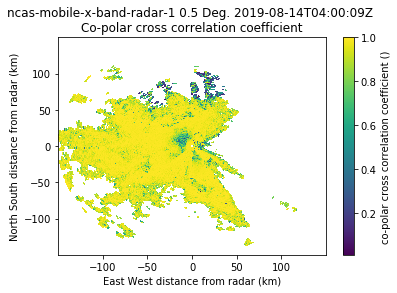

In [10]:
raddisp.plot_ppi('RhoHV', 0)

So there are two regions of low CC to the south of the radar, why? Maybe knowing where the radar is located will help. Pyart has inbuilt plotting onto Cartopy maps too.

/gws/smf/j04/ncas_radar/software/miniconda3/envs/dufton_pyart/lib/python3.7/site-packages/pyart/graph/radarmapdisplay.py:258: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  + "axes.", UserWarning)


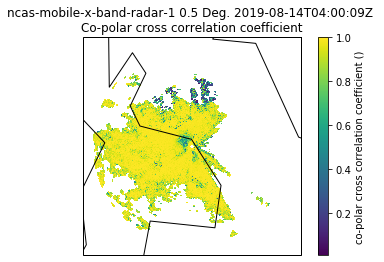

In [11]:
raddisp.plot_ppi_map('RhoHV', 0)

Which is pretty basic, but we can make some changes to improve the plot. Some of the *kwargs for the plot_ppi_map are the same as used in matplotlib and we can also use matplotlib calls to make change to the figure too.

In [14]:
raddisp.plot_ppi_map?

/gws/smf/j04/ncas_radar/software/miniconda3/envs/dufton_pyart/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/gws/smf/j04/ncas_radar/software/miniconda3/envs/dufton_pyart/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces_lines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


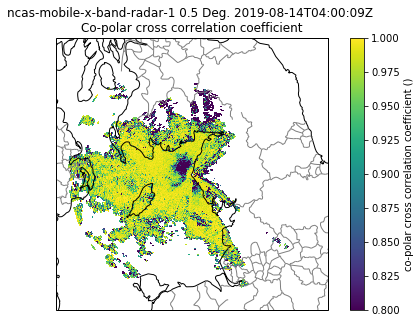

In [15]:
plt.figure(figsize=(8,5)) # Make the figure a bit bigger
raddisp.plot_ppi_map('RhoHV', 0, # Field and sweep
                     resolution='10m', # Improrve the coastline resolution.
                     vmin=0.8, # Set the lower limit of the colourscale
                    )

We can see now that the low CC to the south is just off the coast (firstly) and then in a distinct area to within the sea. 

We can plot all the fields in this way, but we often need to make changes to get usable figures depending on what is being plotted. If we check the reflectivity it might show what these regions are too.

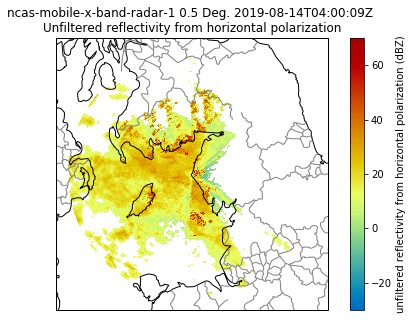

In [16]:
plt.figure(figsize=(8,5)) # Make the figure a bit bigger
raddisp.plot_ppi_map('dBuZ', 0, # Field and sweep
                     resolution='10m', # Improrve the coastline resolution.
                     vmin=-30, # Set the lower limit of the colourscale
                     vmax=70, # Set the upper limit
                     cmap=pyart.graph.cm_colorblind.HomeyerRainbow, # Change the colour map used
                     ) 

The first region isn't visible on this plot. It's likely to be a meteorological signal mixed with a signal from sea clutter of a similar maginitude. The second region is more visible as high reflectivity. It's actually wind farm, and is often visible in the unfiltered data from the radar in this location. Plotting a filtered reflectivity shows that these echoes can be idenfied and removed, though the procedure are not always perfect.

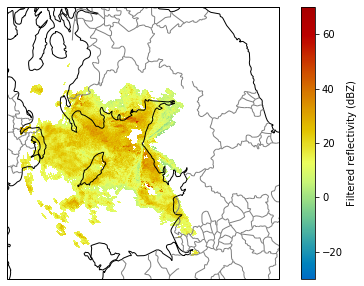

In [17]:
plt.figure(figsize=(8,5)) # Make the figure a bit bigger
raddisp.plot_ppi_map('dBuZ_NRTQC_s', 0, # Field and sweep
                     resolution='10m', # Improrve the coastline resolution.
                     vmin=-30, # Set the lower limit of the colourscale
                     vmax=70, # Set the upper limit
                     cmap=pyart.graph.cm_colorblind.HomeyerRainbow, # Change the colour map used
                     title_flag=False, # Remove the title, sometimes these can get out of hand if the names are very descriptive.
                     colorbar_label='Filtered reflectivity (dBZ)', # Change the label, as above.
                     ) 

### Part 3: Customising plots and looping (getting more complicated).

One useful figure to make is a panel of multiple fields covering the same area. There are many ways to do this which all vary depending on how you define the panels that the plots go in (matplotlib is highly customisable). Here is just one way, maybe not the best for your needs, but I've been working on similar plots at present and have just adapted some code.

In [16]:
import matplotlib.font_manager as mfm
import matplotlib.gridspec as gridspec

Cartopy (which Pyart is now using behind the scenes for the map plots) allows you to define the co-ordinate projections for your plots and the data, and will transform between systems for you. Pyart is doing this in the background too. 

In [17]:
grid_projection = cartopy.crs.AzimuthalEquidistant(central_longitude=radar.longitude['data'][0],
                                                   central_latitude=radar.latitude['data'][0])
projection = cartopy.crs.LambertConformal(central_longitude=radar.longitude['data'][0],
                                          central_latitude=radar.latitude['data'][0])

It's also sometimes easier to loop over what you want to plot, rather than type out each panel individually. To do so using lists of the things that change is helpful. Here we have 9 fields and we also have 9 sets of colormap limits for the plots to visualise the data.

In [18]:
field_list = ['dBuZ', 'dBZ', 'dBZv',
              'ZDR', 'RhoHV', 'uPhiDP',
              'SQI', 'SNR', 'V']

vlimits = [(-30,70), (-30,70),(-30,70),
           (-1,3), (0.8,1), (80,120),
           (0.5,1), (0,15), (-15,15)]

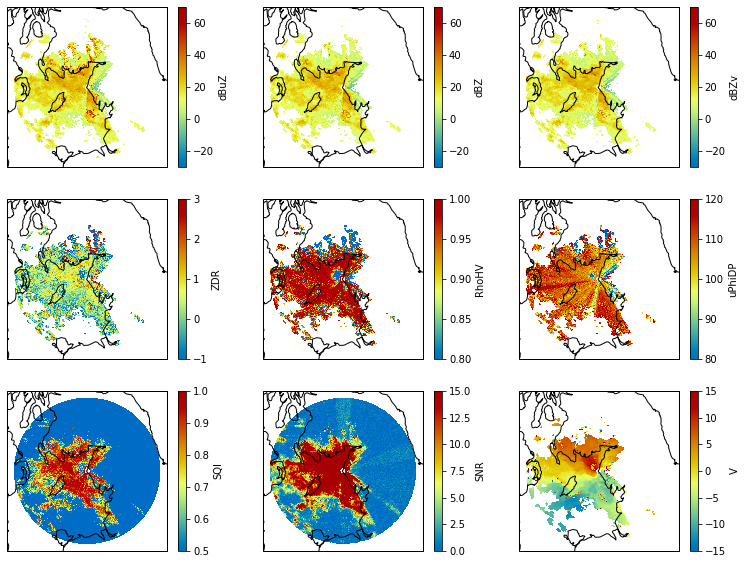

In [19]:
plt.figure(figsize=(14,10))

## This section is creating a grid of panels. 
gs = gridspec.GridSpec(3, 4,
                       width_ratios=[0.8, 0.8, 0.8, 0.05],
                       height_ratios=[1, 1, 1]
                       )

ax1 = plt.subplot(gs[0,0],projection=grid_projection)
ax2 = plt.subplot(gs[0,1],projection=grid_projection)
ax3 = plt.subplot(gs[0,2],projection=grid_projection)


ax4 = plt.subplot(gs[1,0],projection=grid_projection)
ax5 = plt.subplot(gs[1,1],projection=grid_projection)
ax6 = plt.subplot(gs[1,2],projection=grid_projection)

ax7 = plt.subplot(gs[2,0],projection=grid_projection)
ax8 = plt.subplot(gs[2,1],projection=grid_projection)
ax9 = plt.subplot(gs[2,2],projection=grid_projection)


# Then loop over the axes created above, while also looping through the fields and vlimits.
# Zip does this, so that the nth item from each list is returned in each n loop.
for ax,field,vlim in zip([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9],
                     field_list,
                     vlimits):
    
    raddisp.plot_ppi_map(field, sweep=0, ax=ax,
                         embelish=False, # Remove pyarts coastlines
                         title='',
                         colorbar_label=field, # Easy way to label the plots for now, eventually loop around a proper label
                         vmin=vlim[0], # Use the limits defined for each field
                         vmax=vlim[1],
                         cmap=pyart.graph.cm_colorblind.HomeyerRainbow)
    
    ax.coastlines(resolution='10m') # Add our own, this doesn't then add the other boundaries seen in the other plots



By using the loop it is easy to make changes on all panels at once. For example adding range rings and zooming in.

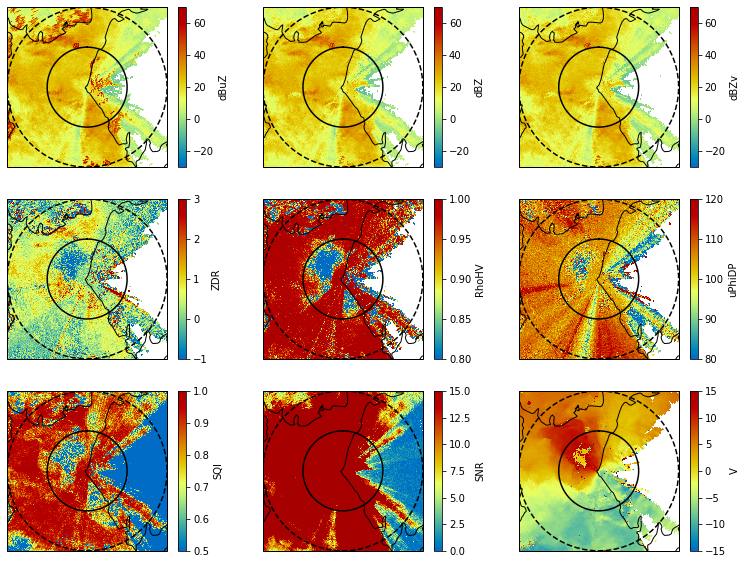

In [20]:
# Define some bounds for the boxes
x0, x1 = -50000, 50000
y0, y1 = -50000, 50000


plt.figure(figsize=(14,10))

gs = gridspec.GridSpec(3, 4,
                       width_ratios=[0.8, 0.8, 0.8, 0.05],
                       height_ratios=[1, 1, 1]
                       )

ax1 = plt.subplot(gs[0,0],projection=grid_projection)
ax2 = plt.subplot(gs[0,1],projection=grid_projection)
ax3 = plt.subplot(gs[0,2],projection=grid_projection)


ax4 = plt.subplot(gs[1,0],projection=grid_projection)
ax5 = plt.subplot(gs[1,1],projection=grid_projection)
ax6 = plt.subplot(gs[1,2],projection=grid_projection)

ax7 = plt.subplot(gs[2,0],projection=grid_projection)
ax8 = plt.subplot(gs[2,1],projection=grid_projection)
ax9 = plt.subplot(gs[2,2],projection=grid_projection)



for ax,field,vlim in zip([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9],
                     field_list,
                     vlimits):
    
    raddisp.plot_ppi_map(field, sweep=0, ax=ax, embelish=False,
                              title='', colorbar_label=field,
                              vmin=vlim[0],
                              vmax=vlim[1],
                              cmap=pyart.graph.cm_colorblind.HomeyerRainbow)
    
    ax.coastlines(resolution='10m')
    
    # Add code to plot range rings and then limit to our new bounds
    raddisp.plot_range_ring(25)
    raddisp.plot_range_ring(50, linestyle='--')
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)

It may also be useful to know where other points are. For example, rain gauges or disdrometer measurements. Here a few points are added to the plots as an example. They are added using a different co-ordinate system to the the plots (here a basic lat lon) to show that Cartopy will transform things if you give it the details.

In [21]:
# Define some point co-ordinates and the reference to their co-ordinate system
xs = [-3.157, -2.554, -2.685, -2.47]
ys = [54.614, 55.05, 54.502, 53.845]
data_crs = cartopy.crs.PlateCarree()

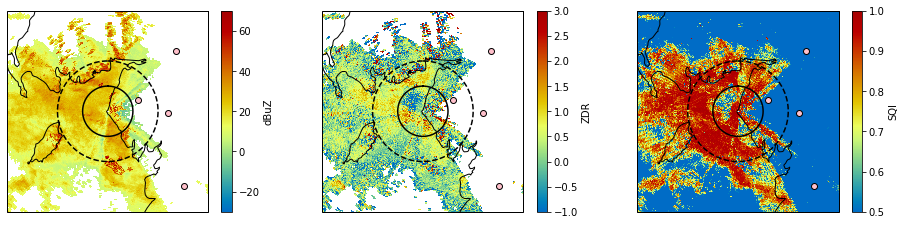

In [22]:
x0, x1 = -100000, 100000
y0, y1 = -100000, 100000

# Creating a smaller plot to plot quicker. Just three panels.

plt.figure(figsize=(16, 3.7))

gs = gridspec.GridSpec(1, 3,
                       width_ratios=[1, 1, 1, ],
                       height_ratios=[1.0,]
                       )

ax1 = plt.subplot(gs[0,0],projection=grid_projection)
ax2 = plt.subplot(gs[0,1],projection=grid_projection)
ax3 = plt.subplot(gs[0,2],projection=grid_projection)


for ax,field,vlim in zip([ax1,ax2,ax3],
                     field_list[::3],
                     vlimits[::3]):
    
    raddisp.plot_ppi_map(field, sweep=0, ax=ax, embelish=False,
                              title='', colorbar_label=field,
                              vmin=vlim[0],
                              vmax=vlim[1],
                              cmap=pyart.graph.cm_colorblind.HomeyerRainbow)
    
    ax.coastlines(resolution='10m')

    raddisp.plot_range_ring(25)
    raddisp.plot_range_ring(50, linestyle='--')
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    
    # Add another plotting command to handle the points. Note the transform keyword to handle the co-ordinate systems.
    pm2 = ax.scatter(xs,
                     ys,
                     c='pink',
                     cmap=pyart.graph.cm_colorblind.HomeyerRainbow,
                     edgecolors= "black",
                     transform=data_crs)

#### Looping over multiple files

Sometimes it is useful to make the same plot for multiple radar files. Once you are happy with a plot it's not too hard to loop using a file list to recreate it several times. This is not the only way to the do the looping but its one option.

In [25]:
# Create a file list using glob.
file_list = glob.glob('/gws/nopw/j04/ncas_radar_vol1/dufton/MRes_tutorial/ncas-mobile-x-band-radar-1_sandwith_20190814-04[01]*_SUR_QCR_v1.nc')

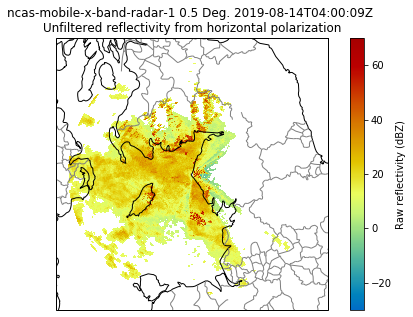

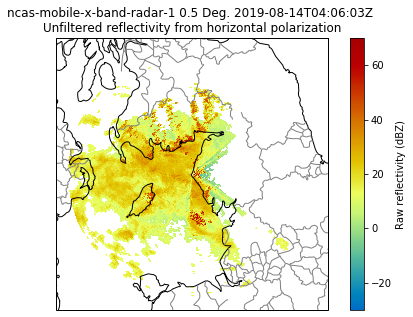

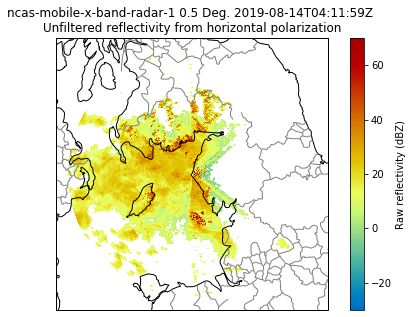

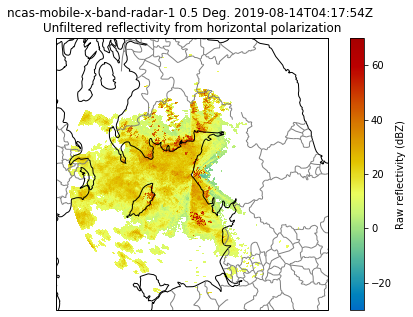

In [26]:
# Loop over the simple one panel ppi from earlier
for radar_file in file_list:
    radar  = pyart.io.read(radar_file, delay_field_loading=True)
    raddisp = pyart.graph.RadarMapDisplay(radar)
    
    plt.figure(figsize=(8,5)) # Make the figure a bit bigger
    raddisp.plot_ppi_map('dBuZ', 0, # Field and sweep
                         resolution='10m', # Improrve the coastline resolution.
                         vmin=-30, # Set the lower limit of the colourscale
                         vmax=70, # Set the upper limit
                         cmap=pyart.graph.cm_colorblind.HomeyerRainbow, # Change the colour map used
                         colorbar_label='Raw reflectivity (dBZ)', # Change the label, as above.
                         )
    plt.show() # Or plt.savefig(...)

Further reading and examples:

https://github.com/openradar/AMS-Open-Source-Radar-2019

